- Geovanne Mansano Fritch da Silva, RA 791072
- Luana de Queiroz Garcia, RA 740953
- Matheus Bessa Coutinho Colombo, RA 801839
- Pedro Freire Baleeiro, RA 790984
- Thiago César Silva Barbieri, RA 779807

Dataset - https://archive.ics.uci.edu/dataset/45/heart+disease

### Complexididade
O dataset apresenta 9 diferentes tipos de dados, com 5 atributos Contínuos, 2 atributos Nominais e 2 Discretos, em que esta variedade de dados nos atributos representa uma certa complexidade na análise e maior cuidade em seu tratamento antes da aplicação dos classificadores.

### Desafiador
O conjunto de dados é desafiador por alguns pontos, como:

- Complexidade Clínica: As doenças cardíacas são uma categoria complexa de condições médicas, que abrangem uma variedade de subtipos, sintomas e fatores de risco. Isso pode tornar a caracterização e o diagnóstico precisos um desafio.
- Heterogeneidade Populacional: A população de pacientes com doenças cardíacas pode ser altamente heterogênea em termos de idade, sexo, histórico médico e estilo de vida. Isso pode dificultar a identificação de padrões consistentes nos dados.
- Aborda uma área em que não dominamos e devido sua complexidade e variedade de atributos, torna-se um desafio ao grupo, pois nos desafia a utilizar diversas técnicas e aprofundar nosso conhecimento na matéria.

### Tópicos:
1. Introdução
1. Exploração do conjunto de dados
1. Limpeza e tratamento dos dados

# 1.Introdução

## Abordagem do problema

Este relatório analisa um conjunto de dados relacionado a pacientes com doenças cardíacas. As doenças cardíacas são uma das principais causas de morbidade e mortalidade globalmente. O objetivo desta análise é identificar padrões e agrupamentos nos dados, utilizando o algoritmo K-Means. Isso pode fornecer insights importantes para a prevenção e tratamento dessas doenças. Este relatório descreve o processo de análise, resultados e implicações clínicas decorrentes desse estudo.

## Descrição do dataset

- **age**: idade

- **sex**: sexo

- **cp**: chest pain -> dor no peito

- **trestbps**: resting blood pressure -> pressão arterial da pessoa em repouso ao chegar no hospital

- **chol**: cholesterol -> colesterol

- **fbs**: fasting blood sugar ->  nível de acuçar no sangue em jejum > 120 mg/dl (1 = true; 0 = false)

- **restecg**: resting electrocardiographic results -> resultado do eletrocardiograma em repouso

- **thalach**: maximum heart rate achieved -> máximo de batimentos cardiacos alcançado

- **exang**: exercise induced angina -> exercício induziu a angina (1 = yes; 0 = no)

- **oldpeak**: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
-> depressão de ST induzida por exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG)

- **slope**: the slope of the peak exercise ST segment — 1: downsloping; 2: flat; 3: upsloping
-> inclinação do pico do segmento ST do exercício — 1: descendente; 2: plano; 3: ascendente

- **ca**: number of major vessels colored by flourosopy -> número de vasos principais coloridos por fluoroscopia (0-3) 

- **thal**: thalassemia -> talassemia 3 = normal; 6 = fixed defect; 7 = reversable defect

- **num**: diagnosis of heart disease (angiographic disease status) -> diagnóstico de doença cardíaca (estado angiográfico da doença): Valor 0: < 50% estreitamento do diâmetro da artéria (ausência de doença coronária); - Valores 1-4: > 50% estreitamento do diâmetro da artéria (presença de doença coronária)

In [84]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np

from scipy.io import arff
from scipy.io.arff import loadarff 
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

In [85]:
df = pd.read_csv('heart.cleveland.data')

## 2. Exploração do conjunto de dados

In [86]:
# Primeiros 10 elementos do dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [87]:
# Últimos 10 elementos do dataset
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [88]:
# Proporção do conjunto de dados, 14 dimensões e 303 amostras
df.shape

(303, 14)

In [89]:
# Tipos de dados presentes no dataset: 11 pontos flutuantes, 2 objetos e 1 inteiro
df.dtypes.value_counts()

float64    11
object      2
int64       1
dtype: int64

In [90]:
# Atributos do tipo 'float64'
df.select_dtypes(include=['float64'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0


In [91]:
# Atributos do tipo 'object'
df.select_dtypes(include=['object'])

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0
...,...,...
298,0.0,7.0
299,2.0,7.0
300,1.0,7.0
301,1.0,3.0


In [92]:
# Atributos do tipo 'int64'
df.select_dtypes(include=['int64'])

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [93]:
# Idade conta com 41 idades distintas
df['age'].nunique()

41

In [94]:
# Idade mínima
df['age'].min()

29.0

In [95]:
# Idade máxima
df['age'].max()

77.0

In [96]:
# Tipos e quantidades do atributo 'sex'
df['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [97]:
# 'cp', chest pain type ou tipo de dor no peito
# value 1: asymptomatic (assintomático)
# value 2: atypical angina (dor no peito atipico) 
# value 3: non-anginal pain (sem dor no peito)
# value 4: typical angina (dor no peito típica)

df['cp'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

In [98]:
# Trestbps, the person's resting blood pressure (mm Hg on admission to the hospital)
# Ou seja, a pressão arterial da pessoa em repouso ao chegar no hospital
df['trestbps']

0      145.0
1      160.0
2      120.0
3      130.0
4      130.0
       ...  
298    110.0
299    144.0
300    130.0
301    130.0
302    138.0
Name: trestbps, Length: 303, dtype: float64

In [99]:
# Valor mínimo de pressão arterial
df['trestbps'].min()

94.0

In [100]:
# Valor máximo de pressão arterial
df['trestbps'].max()

200.0

In [101]:
# 'chol', the person's cholesterol measurement in mg/dl, ou seja, nível de colesterol
print('min:', df['chol'].min())
print('max:', df['chol'].max())
print('média:', df['chol'].mean())

min: 126.0
max: 564.0
média: 246.69306930693068


In [102]:
#"fbs", the person's fasting blood sugar, ou seja, nível de acuçar no sangue em jejum (> 120 mg/dl, 1 = true; 0 = false) 
df['fbs'].value_counts()

0.0    258
1.0     45
Name: fbs, dtype: int64

In [103]:
# 'restecg', resting electrocardiographic results ou resultado do eletrocardiograma em repouso
# value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
# (mostrando hipertrofia ventricular esquerda provável)
# value 1: normal (normal)
# value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), onda ST-T anormal
df['restecg'].value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

In [104]:
# 'thalach', maximum heart rate achieved, máximo de batimentos cardiacos alcançado
print('min:', df['thalach'].min())
print('max:', df['thalach'].max())

min: 71.0
max: 202.0


In [105]:
# exang: exercise induced angina, exercício induziu a angina (1 = yes; 0 = no)
df['exang'].value_counts()

0.0    204
1.0     99
Name: exang, dtype: int64

In [106]:
# 'oldpeak', ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
# depressão de ST induzida por exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG)
df['oldpeak'].mean()

1.0396039603960396

In [107]:
# 'slope', the slope of the peak exercise ST segment — 1: downsloping; 2: flat; 3: upsloping
# inclinação do pico do segmento ST do exercício — 1: descendente; 2: plano; 3: ascendente
df['slope'].value_counts()

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64

In [108]:
#' ca', number of major vessels colored by flourosopy 
# número de vasos principais coloridos por fluoroscopia (0-3) 
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [109]:
# thalassemia, 3 = normal; 6 = fixed defect; 7 = reversable defect
# talassemia, 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [110]:
# diagnosis of heart disease (angiographic disease status),
# diagnóstico de doença cardíaca (estado angiográfico da doença)
#       - Value 0: < 50% estreitamento do diâmetro
#       - Values 1-4: > 50% estreitamento do diâmetro
df['num '].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num , dtype: int64

In [111]:
# Informações gerais do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [112]:
# Informações estatísticas pertinentes em relação à cada dimensão do dataset, alguns já calculados anteriormente
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## 3. Limpeza e tratamento dos dados

- Dados Faltantes/Inconsistentes ('?') ok
- Dados duplicados ok
- Transformações para númérico ok
- Correlação, heatmap ok
- Normalização ok
- Outliers ok

In [113]:
# Verificação de dados faltantes, não há
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [114]:
# Encontrando tuplas duplicadas, não há
duplicated_indices = df.duplicated(keep=False)
duplicated_indices.value_counts()

False    303
dtype: int64

In [115]:
# Transformação dos atributos object para numérico
df_object = df.select_dtypes(include=['object'])
df_object

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0
...,...,...
298,0.0,7.0
299,2.0,7.0
300,1.0,7.0
301,1.0,3.0


In [116]:
# Como obsevado na análise exploratória vamos remover os atributos do dataset 
# que contêm estes campos preenchidos com '?'
indexes = list((df_object.index[df_object['ca']=='?'])) +  list(df_object.index[df_object['thal']=='?'])
print("Índices das amostras inconsistentes:", indexes)
print("Total de amostras inconsistentes:", len(indexes))

Índices das amostras inconsistentes: [166, 192, 287, 302, 87, 266]
Total de amostras inconsistentes: 6


In [117]:
# Removendo as tuplas
df.drop(indexes, inplace=True)

In [118]:
df.reset_index(inplace=True, drop=True)

In [119]:
# Proporção do dataframe após a remoção
df.shape

(297, 14)

In [120]:
# Transformando os atributos para numérico
df[['ca', 'thal']] = df[['ca', 'thal']].apply(pd.to_numeric)

In [121]:
# Todos os atributos do df no formato numérico
df.dtypes.value_counts()

float64    13
int64       1
dtype: int64

In [122]:
# Encontrando a correlação dos atributos
corr_mat = df.corr(method='pearson')
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


In [123]:
# Matriz de correlação
corr_mat = df.corr(method='pearson')

# Matêm apenas os valores do triângulo superior da matiz de correlação
upper_corr_mat = np.triu(corr_mat)

# Transforma os valores do triângulo inferior em NUll
upper_corr_mat_ = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype('bool'))
  
# Converte para 1-D series e remove valores Null
unique_corr_pairs = upper_corr_mat_.unstack().dropna()
  
# Ordena os pares de correlação
sorted_mat = unique_corr_pairs.sort_values()

# Transforma series para DataFrame para melhor visualização
sorted_mat = sorted_mat.to_frame()
sorted_mat

0
num     thalach -0.420639
thalach age     -0.394563
slope   thalach -0.389307
exang   thalach -0.384368
oldpeak thalach -0.347640
...                   ...
num     cp       0.404248
        oldpeak  0.501461
        thal     0.513377
        ca       0.521178
slope   oldpeak  0.579037

[91 rows x 1 columns]

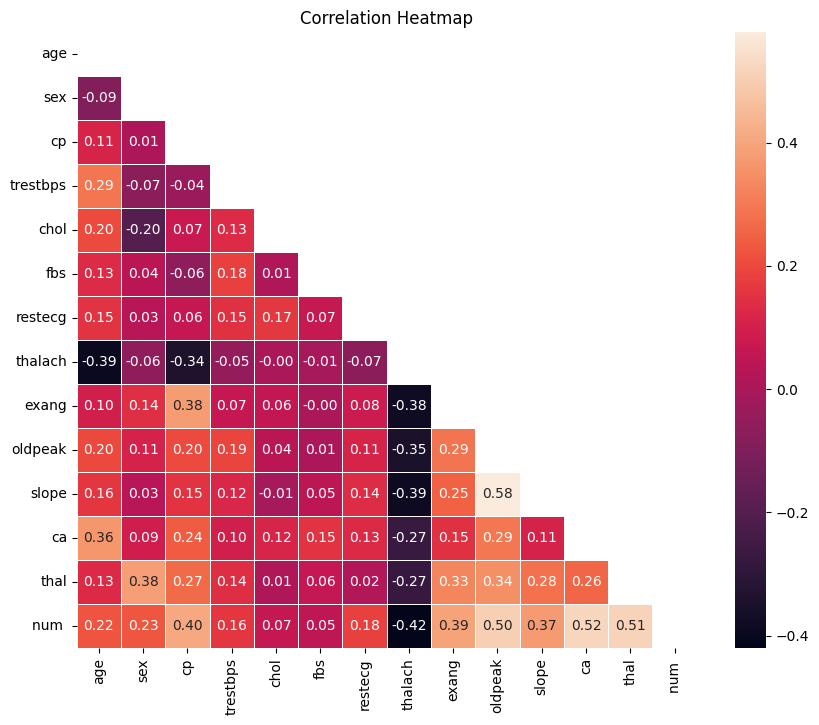

In [124]:
# Setando o tamanho da figura
plt.figure(figsize=(10, 8))

# Criando o mapa de calor
sns.heatmap(corr_mat, mask=upper_corr_mat, annot=True, fmt=".2f", linewidths=0.5)

#  Imprimindo
plt.title("Correlation Heatmap")
plt.show()

In [125]:
# Remoção do target para realização do agrupamento
target_df = df.copy()
df.drop(['num '], axis=1, inplace=True)

In [126]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [127]:
target_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [128]:
# Realizando a Normalização dos dados

# Inicializando o StandardScaler
scaler = StandardScaler()

# Ajustando e transformando os dados utilizando o escalador
scaled_data = scaler.fit_transform(df)

# Ciando um novo DataFrame com os dados normalizados
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.272059,-1.446980,0.873880,0.468418,-0.122330,-0.411450,-1.003419,-1.161395,1.435916,-0.734914,0.643781,-0.721976,1.172577
293,-1.056185,0.691095,-2.240629,-1.223355,0.320744,-0.411450,-1.003419,-0.768432,-0.696419,0.124076,0.643781,-0.721976,1.172577
294,1.489615,0.691095,0.873880,0.693988,-1.047008,2.430427,-1.003419,-0.375469,-0.696419,2.013854,0.643781,1.411625,1.172577
295,0.272059,0.691095,0.873880,-0.095506,-2.241384,-0.411450,-1.003419,-1.510696,1.435916,0.124076,0.643781,0.344824,1.172577


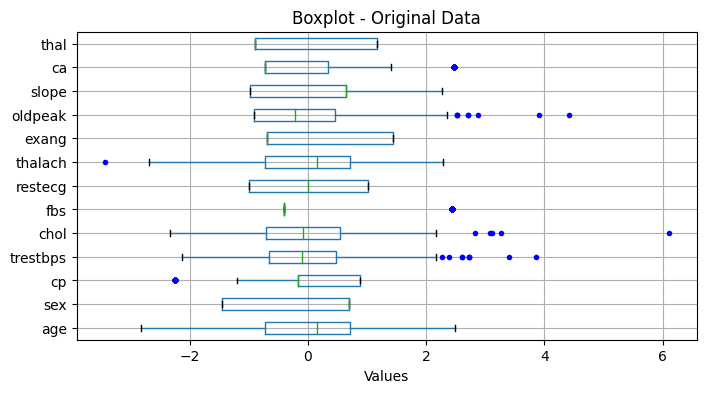

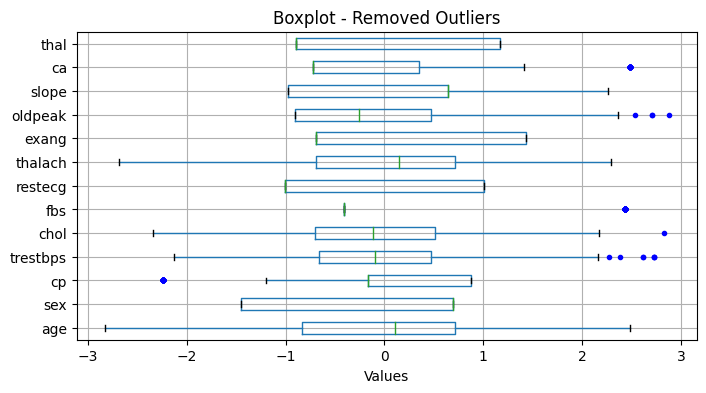

In [129]:
# Copia o conjunto de dados para detecção do outlier
df_copy = scaled_df.copy()

# Define o limite para a detecção de outlier (e.g., Z-score > 3 ou Z-score < -3)
threshold = 3

# Calcula o Z-score para cada coluna do df
z_scores = np.abs(stats.zscore(df_copy))

# Cria a mask para idenfificar outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Indicies dos outliers
outlier_indices = outlier_mask.index[outlier_mask == True].tolist()

# Remove os outliers do dataframe
processed_df = scaled_df.drop(outlier_indices)
processed_df.reset_index(inplace=True, drop=True)

# Cria o boxplot para visualizar o df original
plt.figure(figsize=(8, 4))
df_copy.boxplot(sym='b.', vert=False)
plt.xlabel('Values')
plt.title('Boxplot - Original Data')
plt.show()

# Visualização do df sem outliers
plt.figure(figsize=(8, 4))
processed_df.boxplot(sym='b.', vert=False)
plt.xlabel('Values')
plt.title('Boxplot - Removed Outliers')
plt.show()

In [130]:
# Remoção dos outliers do target_df, para ambos ficarem com mesma quantidade de tuplas para análise futura após agrupamento
target_df = target_df.drop(outlier_indices)
target_df.reset_index(inplace=True, drop=True)

In [131]:
# Exibindo os índicies e total de outliers encontrados
print("Índices dos outliers:", outlier_indices)
print("Total de outliers encontrados:", len(outlier_indices))

Índices dos outliers: [48, 90, 120, 122, 125, 151, 179, 186, 242]
Total de outliers encontrados: 9


In [132]:
processed_df.shape

(288, 13)

In [133]:
target_df.shape

(288, 14)

In [134]:
processed_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.272059,-1.446980,0.873880,0.468418,-0.122330,-0.411450,-1.003419,-1.161395,1.435916,-0.734914,0.643781,-0.721976,1.172577
284,-1.056185,0.691095,-2.240629,-1.223355,0.320744,-0.411450,-1.003419,-0.768432,-0.696419,0.124076,0.643781,-0.721976,1.172577
285,1.489615,0.691095,0.873880,0.693988,-1.047008,2.430427,-1.003419,-0.375469,-0.696419,2.013854,0.643781,1.411625,1.172577
286,0.272059,0.691095,0.873880,-0.095506,-2.241384,-0.411450,-1.003419,-1.510696,1.435916,0.124076,0.643781,0.344824,1.172577


In [135]:
target_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
284,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
285,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
286,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


## 3. Agrupamento do Conjunto de Dados

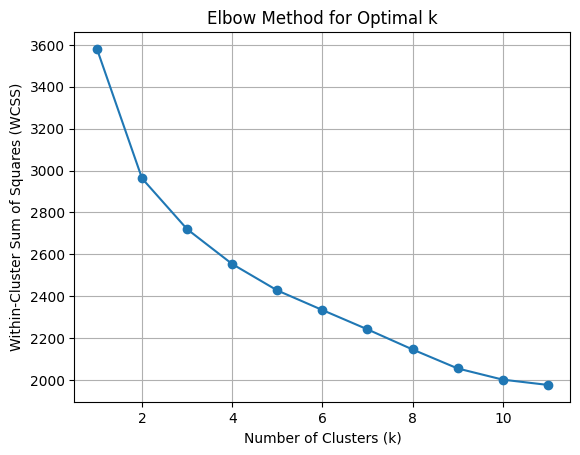

In [136]:
# Defina um intervalo de valores k possíveis para tentar (por exemplo, de 1 a 10)
k_values = range(1, 12, 1)

# Inicializa uma lista para armazenar a soma dos quadrados dentro do cluster (WCSS) para cada k
wcss_values = []

# Calcula WCSS para cada valor k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(processed_df)
    wcss_values.append(kmeans.inertia_)

# Plota a curva do cotovelo
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Explained Variance Ratio for k=3: [0.23670285 0.12005134 0.0989919 ]


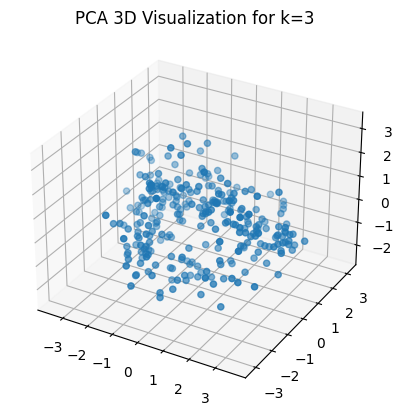

In [137]:
k=3 

# Initialize PCA with the specified number of components
pca = PCA(n_components=k)

# Fit PCA to the scaled data
pca.fit(processed_df)

# Transform the data to the lower-dimensional space
pca_result = pca.transform(processed_df)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for k={k}:", explained_variance_ratio)

# Create a new figure for each value of k
fig = plt.figure()

# 3D Visualization for k=3
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
plt.title(f'PCA 3D Visualization for k={k}')

plt.show()

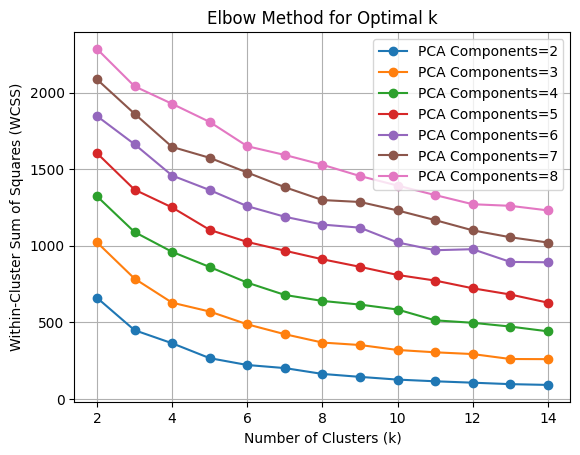

In [203]:
# Define um intervalo de valores k possíveis para tentar (por exemplo, de 1 a 10)
k_values = range(2, 15, 1)
j_values = range(2, 9)

# Inicializa uma lista para armazenar a soma dos quadrados dentro do cluster (WCSS) para cada k
wcssj_values = []
silhouette_scores_df = pd.DataFrame(columns=k_values, index=j_values)

for j in j_values:
    wcss_values = []
    for k in k_values:
        # Inicializa o PCA com o número especificado de componentes
        pca = PCA(n_components=j)
        
        # Ajustar o PCA aos dados pré-processados
        pca.fit(processed_df)

        # Transforma os dados no espaço de menor dimensão
        pca_result = pca.transform(processed_df)

        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans_labels = kmeans.fit_predict(pca_result)
        silhouette_avg = silhouette_score(pca_result, kmeans_labels)
        silhouette_scores_df.loc[j, k] = silhouette_avg
        wcss_values.append(kmeans.inertia_)

    # Anexa a lista wcss_values à lista wcssj_values para cada valor de j
    wcssj_values.append(wcss_values)

# Plote a curva do cotovelo para cada valor de j
for j, wcss_values in zip(j_values, wcssj_values):
    plt.plot(k_values, wcss_values, marker='o', label=f'PCA Components={j}')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.grid(True)
plt.show()

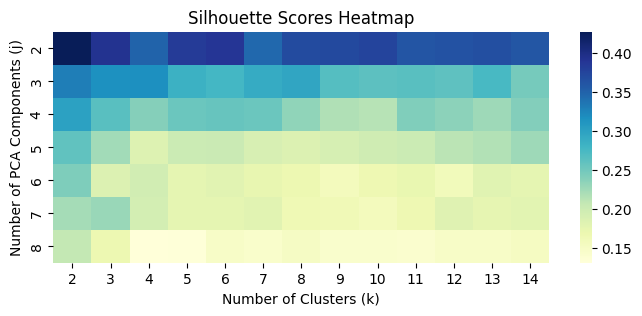

In [207]:
silhouette_scores_df = silhouette_scores_df.astype('float64')

plt.figure(figsize=(8, 3))
sns.heatmap(silhouette_scores_df, cmap="YlGnBu")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Number of PCA Components (j)")
plt.title("Silhouette Scores Heatmap")
plt.show()

In [139]:
# Inicializa o PCA com o número especificado de componentes
pca = PCA(n_components=4)

# Ajustar o PCA aos dados pré-processados
pca.fit(processed_df)

# Transforma os dados no espaço de menor dimensão
pca_result = pca.transform(processed_df)

Scores for k values: 


{2: 0.3008813882631243,
 3: 0.26485222218788723,
 4: 0.2393113344885445,
 5: 0.2544897842452073,
 6: 0.2561759324302699,
 7: 0.25448122060441175,
 8: 0.2329956907608745,
 9: 0.21730923627301252,
 10: 0.21403931208449423,
 11: 0.24158090272417365}

In [140]:
# Acho que vamos ter que diminuir as componentes da PCA... por mais q a gente tenha consiga bons resultados, 
# tá bem complicada a explicabilidade desse negócio
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=df.columns)

loadings_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.293436,0.166091,0.293668,0.139326,0.063613,0.075964,0.144658,-0.409527,0.356117,0.352989,0.330393,0.305132,0.358490
1,-0.499355,0.419641,0.171757,-0.408606,-0.293555,-0.254690,-0.240121,0.036475,0.200186,0.063001,0.045899,-0.160221,0.310218
2,-0.009520,0.520418,-0.420878,0.221729,-0.186939,0.528217,0.059959,0.216386,-0.224892,0.039513,-0.009119,0.102705,0.275002
3,-0.153922,-0.132734,-0.350633,0.168238,-0.108933,-0.159891,0.173570,-0.017636,-0.049776,0.373947,0.611340,-0.457097,-0.120768


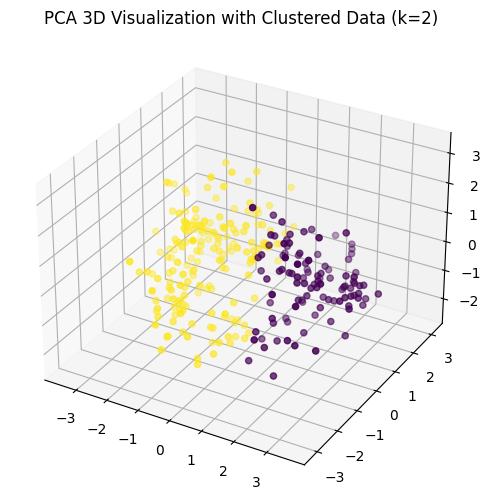

In [185]:
num_clusters = 2

# Criar agrupamento K-means
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
kmeans_labels = kmeans.fit_predict(pca_result)

# Visualização de PCA 3D e dados agrupados
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_title('PCA 3D Visualization with Clustered Data (k={})'.format(num_clusters))
plt.show()

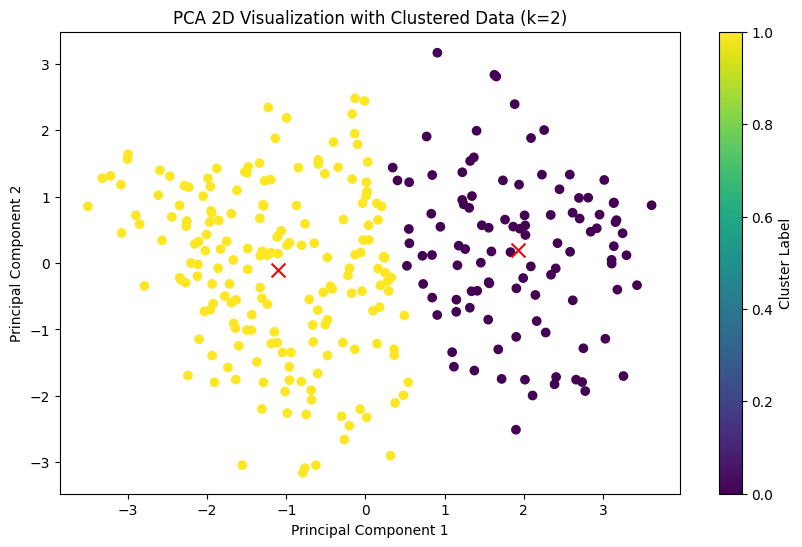

In [186]:
# Visualização de PCA 2D e dados agrupados
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Visualization with Clustered Data (k={})'.format(num_clusters))
plt.colorbar(label='Cluster Label')
plt.show()

In [187]:
# Visualização de PCA 3D e dados agrupados usando plotly
fig = px.scatter_3d(x=pca_result[:, 0], y=pca_result[:, 1], z=pca_result[:, 2],
                    color=kmeans_labels, color_continuous_scale='viridis')
fig.update_layout(scene=dict(xaxis_title='Custom X Label',
                             yaxis_title='Custom Y Label',
                             zaxis_title='Custom Z Label'),
                             title='PCA 3D Visualization with Clustered Data (k={})'.format(num_clusters))
fig.show()